# Capstone Assignment: Initial Report and Exploratory Data Analysis (EDA)

### **Research Question**: Can we predict how many fantasy points an NFL player will score?

In the world of fantasy sports and sports betting, gaining an edge is everything. Whether you're competing in a fantasy league with friends for bragging rights (and maybe a bit of cash) or analyzing odds at a professional sportsbook, knowing how players will perform is crucial.

Sportsbooks rely on highly accurate models and projections to turn a profit, while bettors and fantasy players use data-driven insights to make informed decisions. My analysis aims to help fantasy football players and sports bettors navigate the unpredictable and chaotic football season with more confidence.

The data I will be using in this project is from Kaggle and can be found here: https://www.kaggle.com/datasets/philiphyde1/nfl-stats-1999-2022

Included in this data is various stats for players and teams on a weekly or yearly basis. This includes stats like receptions, targets, receiving yards, rushing yards, yards after catch, etc.

In [1050]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from warnings import filterwarnings
filterwarnings('ignore')

In [1051]:
yearly_player_data = pd.read_csv("data/yearly_player_data.csv")

In [1052]:
yearly_player_data.head()

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,A.J. Brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,A.J. Brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,A.J. Brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,A.J. Brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,A.J. Brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0


### Understanding The Data

In [1053]:
yearly_player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Columns: 195 entries, team to vacated_total_yards
dtypes: float64(167), int64(22), object(6)
memory usage: 8.4+ MB


In [1054]:
yearly_player_data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,5663.0,2017.969981,3.347339,2012.0,2015.0,2018.0,2021.0,2023.0
depth,5663.0,1.823415,0.715353,1.0,1.0,2.0,2.0,3.0
pass_attempts,5663.0,38.852552,130.311182,0.0,0.0,0.0,0.0,758.0
complete_pass,5663.0,23.031256,78.500965,0.0,0.0,0.0,0.0,490.0
incomplete_pass,5663.0,12.307081,41.075541,0.0,0.0,0.0,0.0,271.0
...,...,...,...,...,...,...,...,...
vacated_rush_attempts,5304.0,117.018854,108.094482,0.0,22.0,87.0,204.0,411.0
vacated_rushing_yards,5304.0,479.463801,442.960916,0.0,94.0,352.0,781.0,1979.0
vacated_run_td,5304.0,3.359540,3.555581,0.0,0.0,2.0,5.0,19.0
vacated_touches,5304.0,355.601433,293.167502,0.0,123.0,283.0,504.5,1215.0


In [1055]:
for col in yearly_player_data.columns:
    print(col)

team
player_id
player_name
position
season
depth
pass_attempts
complete_pass
incomplete_pass
passing_yards
passing_air_yards
pass_td
interception
pass_fumble_lost
targets
receptions
receiving_yards
receiving_air_yards
yards_after_catch
reception_td
reception_fumble_lost
rush_attempts
rushing_yards
run_td
run_fumble_lost
fantasy_points_ppr
air_yards_share
target_share
comp_pct
int_pct
pass_td_pct
ypa
rec_td_pct
yptarget
ypr
rush_td_pct
ypc
touches
total_tds
td_pct
total_yards
yptouch
games
pass_ypg
rec_ypg
rush_ypg
ypg
ppg
passer_rating
game_type
offense_pct
delta_depth
delta_pass_attempts
delta_targets
delta_rush_attempts
delta_air_yards_share
delta_target_share
delta_comp_pct
delta_int_pct
delta_pass_td_pct
delta_ypa
delta_rec_td_pct
delta_yptarget
delta_rush_td_pct
delta_ypc
delta_touches
delta_td_pct
delta_yptouch
delta_games
delta_pass_ypg
delta_rec_ypg
delta_rush_ypg
delta_ypg
delta_ppg
delta_passer_rating
delta_offense_pct
team_total_snaps
team_yards_gained
team_pass_snaps_count


In [1056]:
# List object columns and their value counts
object_columns = yearly_player_data.select_dtypes(include='object').columns

for col in object_columns:
    print("---- %s ----" % col)
    print(yearly_player_data[col].value_counts().sort_index())

---- team ----
team
ARI    199
ATL    169
BAL    188
BUF    182
CAR    165
CHI    190
CIN    184
CLE    182
DAL    174
DEN    194
DET    180
GB     180
HOU    193
IND    189
JAX    193
KC     174
LA     123
LAC    116
LV      63
MIA    189
MIN    172
NE     185
NO     189
NYG    198
NYJ    197
PHI    180
PIT    176
SEA    176
SF     193
TB     184
TEN    182
WAS    204
Name: count, dtype: int64
---- player_id ----
player_id
00-0000865    1
00-0004541    1
00-0006101    2
00-0007091    4
00-0010346    4
             ..
00-0039150    1
00-0039152    1
00-0039163    1
00-0039164    1
00-0039165    1
Name: count, Length: 1579, dtype: int64
---- player_name ----
player_name
A.J. Brown         5
A.J. Derby         3
A.J. Dillon        4
A.J. Green        10
A.J. Jenkins       3
                  ..
Zamir White        2
Zander Horvath     1
Zay Flowers        1
Zay Jones          6
Zonovan Knight     2
Name: count, Length: 1572, dtype: int64
---- position ----
position
QB     819
RB    1492
T

In [1057]:
# Removing this column as there is only one value in it
yearly_player_data.drop(columns=['game_type'], inplace=True)

In [1058]:
yearly_player_data['fantasy_points_ppr'].head() # This will serve as our target variable

,fantasy_points_ppr
0,217.1
1,246.5
2,180.9
3,303.6
4,293.6


In [1059]:
yearly_player_data['season'].value_counts().sort_index()

,count
season,
2012,359
2013,362
2014,387
2015,414
2016,467
2017,486
2018,517
2019,516
2020,549


### Data Preparation

In [1060]:
# Check for missing data and the percentage of the total
missing_data = yearly_player_data.isnull().sum()
missing_percentage = (missing_data / len(yearly_player_data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_df

,Missing Values,Percentage
team,0,0.000000
player_id,0,0.000000
player_name,0,0.000000
position,0,0.000000
season,0,0.000000
...,...,...
vacated_rush_attempts,359,6.339396
vacated_rushing_yards,359,6.339396
vacated_run_td,359,6.339396
vacated_touches,359,6.339396


In [1061]:
missing_df = missing_df.loc[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
missing_df

,Missing Values,Percentage
vacated_receptions,359,6.339396
vacated_receiving_yards,359,6.339396
vacated_touches,359,6.339396
vacated_run_td,359,6.339396
vacated_rushing_yards,359,6.339396
vacated_rush_attempts,359,6.339396
vacated_reception_td,359,6.339396
vacated_yards_after_catch,359,6.339396
vacated_receiving_air_yards,359,6.339396
vacated_total_yards,359,6.339396


In [1062]:
yearly_player_data.loc[yearly_player_data['college'].isnull()]

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
2632,SF,00-0031493,Jarryd Hayne,RB,2015,2.0,0.0,0.0,0.0,0.0,...,19.0,172.0,335.0,81.0,0.0,118.0,473.0,5.0,138.0,658.0


In [1063]:
yearly_player_data.loc[yearly_player_data['player_name'] == 'Jarryd Hayne']

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
2632,SF,00-0031493,Jarryd Hayne,RB,2015,2.0,0.0,0.0,0.0,0.0,...,19.0,172.0,335.0,81.0,0.0,118.0,473.0,5.0,138.0,658.0


In [1064]:
yearly_player_data = yearly_player_data[yearly_player_data['college'].notna()]

In [1065]:
# Check correlation between 'vacated' columns and target
vacated_cols = [col for col in yearly_player_data.columns if 'vacated' in col]
vacated_corr = yearly_player_data[vacated_cols + ['fantasy_points_ppr']].corr()
vacated_corr_ppr_points = vacated_corr['fantasy_points_ppr'].drop('fantasy_points_ppr').sort_values(ascending=False)
vacated_corr_ppr_points

,fantasy_points_ppr
vacated_reception_td,-0.009950
vacated_run_td,-0.019996
vacated_receiving_air_yards,-0.025381
vacated_receiving_yards,-0.031731
vacated_yards_after_catch,-0.034927
vacated_pass_td,-0.037739
vacated_interception,-0.039560
vacated_targets,-0.039963
vacated_receptions,-0.040038
vacated_passing_yards,-0.041087


In [1066]:
yearly_player_data.drop(columns=vacated_cols, inplace=True)
yearly_player_data.shape

(5662, 176)

The columns that consisted of missing values were the 'vacated' columns and one missing value from the 'college' column. I removed this one row from the 'college' column as it was a player that only played one season and didn't score many points.

There were 359 missing values from the 'vacated' columns which is around 6.34 of the data. These features also have very low correlation with our target variable, fantasy_points_ppr, so I removed them.

In [1067]:
yearly_player_data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,5662.0,2017.970505,3.347402,2012.0,2015.0000,2018.000,2021.000,2023.00
depth,5662.0,1.823384,0.715412,1.0,1.0000,2.000,2.000,3.00
pass_attempts,5662.0,38.859414,130.321668,0.0,0.0000,0.000,0.000,758.00
complete_pass,5662.0,23.035323,78.507301,0.0,0.0000,0.000,0.000,490.00
incomplete_pass,5662.0,12.309255,41.078843,0.0,0.0000,0.000,0.000,271.00
...,...,...,...,...,...,...,...,...
average_rush_ypg,5662.0,11.378410,19.303075,-6.0,0.0000,1.130,15.200,131.19
average_ypg,5662.0,NaN,NaN,-inf,19.8425,36.525,65.075,inf
average_ppg,5662.0,NaN,NaN,-inf,4.0300,6.985,11.610,inf
injuries,5662.0,3.138644,2.604406,0.0,1.0000,2.000,4.000,18.00


In [1068]:
for col in yearly_player_data.columns:
    print("---- %s ----" % col)
    print(yearly_player_data[col].value_counts().sort_index())

---- team ----
team
ARI    199
ATL    169
BAL    188
BUF    182
CAR    165
CHI    190
CIN    184
CLE    182
DAL    174
DEN    194
DET    180
GB     180
HOU    193
IND    189
JAX    193
KC     174
LA     123
LAC    116
LV      63
MIA    189
MIN    172
NE     185
NO     189
NYG    198
NYJ    197
PHI    180
PIT    176
SEA    176
SF     192
TB     184
TEN    182
WAS    204
Name: count, dtype: int64
---- player_id ----
player_id
00-0000865    1
00-0004541    1
00-0006101    2
00-0007091    4
00-0010346    4
             ..
00-0039150    1
00-0039152    1
00-0039163    1
00-0039164    1
00-0039165    1
Name: count, Length: 1578, dtype: int64
---- player_name ----
player_name
A.J. Brown         5
A.J. Derby         3
A.J. Dillon        4
A.J. Green        10
A.J. Jenkins       3
                  ..
Zamir White        2
Zander Horvath     1
Zay Flowers        1
Zay Jones          6
Zonovan Knight     2
Name: count, Length: 1571, dtype: int64
---- position ----
position
QB     819
RB    1491
T

I noticed there are some columns with weird values like 'inf' and '-inf' as well as some columns with very large numbers in the negatives.

In [1069]:
# Get sum of 'inf', '-inf', and extreme negative values
yearly_player_data = yearly_player_data.apply(pd.to_numeric, errors='ignore')

inf_counts = (yearly_player_data == np.inf).sum().sum()
neg_inf_counts = (yearly_player_data == -np.inf).sum().sum()
extreme_neg_counts = (yearly_player_data.select_dtypes(include=[np.number]) < -100).sum().sum()

print("Infinite values: {}".format(inf_counts))
print("Negative infinite values: {}".format(neg_inf_counts))
print("Extreme negative values: {}".format(extreme_neg_counts))

Infinite values: 9
Negative infinite values: 3
Extreme negative values: 89


In [1070]:
yearly_player_data.replace([np.inf, -np.inf], np.nan, inplace=True)
print(yearly_player_data.isin([np.inf, -np.inf]).sum().sum())

0


In [1071]:
print(yearly_player_data.isnull().sum().sum())

12


In [1072]:
# Remove 'inf' and '-inf' samples
yearly_player_data.dropna(inplace=True)

In [1073]:
# Get columns with negative values under -100 and count
neg_cols = (yearly_player_data.select_dtypes(include=[np.number]) < -100).sum()
neg_cols = neg_cols[neg_cols > 0]
print("Columns with large negative values and their count:")
print(neg_cols)

Columns with large negative values and their count:
receiving_air_yards             7
passer_rating                  17
delta_pass_ypg                  1
delta_rec_ypg                   1
delta_rush_ypg                  5
delta_ypg                       1
delta_ppg                       2
delta_passer_rating             1
career_receiving_air_yards     44
average_receiving_air_yards     7
dtype: int64


Passer ratings in the NFL are on a scale from 0 to 158.3. For this reason, I will replace any negative values with 0.

In [1074]:
# Restrict min passer rating to 0
yearly_player_data['passer_rating'] = yearly_player_data['passer_rating'].apply(lambda x: max(x, 0))
yearly_player_data['delta_passer_rating'] = yearly_player_data['delta_passer_rating'].apply(lambda x: max(x, 0))

In [1075]:
neg_cols = (yearly_player_data.select_dtypes(include=[np.number]) < -100).sum()
neg_cols = neg_cols[neg_cols > 0]
print("Columns with large negative values and their count:")
print(neg_cols)

Columns with large negative values and their count:
receiving_air_yards             7
delta_pass_ypg                  1
delta_rec_ypg                   1
delta_rush_ypg                  5
delta_ypg                       1
delta_ppg                       2
career_receiving_air_yards     44
average_receiving_air_yards     7
dtype: int64


In [1076]:
# Changing very negative values to values in the 5th percentile
for col in ['receiving_air_yards', 'career_receiving_air_yards', 'average_receiving_air_yards',
            'delta_pass_ypg', 'delta_rec_ypg', 'delta_rush_ypg', 'delta_ypg', 'delta_ppg']:
    min_valid_value = yearly_player_data[col][yearly_player_data[col] > -100].quantile(0.05) #5th percentile
    yearly_player_data[col] = yearly_player_data[col].apply(lambda x: min_valid_value if x < -100 else x)

In [1077]:
extreme_neg_counts_after = (yearly_player_data.select_dtypes(include=[np.number]) < -100).sum().sum()
print(f"Extreme negative values after cleanup: {extreme_neg_counts_after}")

Extreme negative values after cleanup: 0


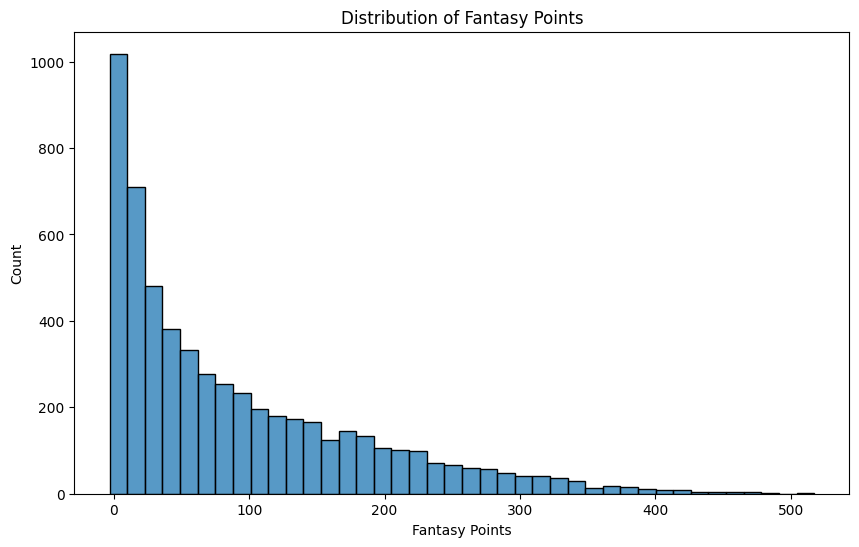

In [1078]:
plt.figure(figsize=(10, 6))
sns.histplot(yearly_player_data, x='fantasy_points_ppr', bins=40)
plt.title("Distribution of Fantasy Points")
plt.xlabel("Fantasy Points")
plt.show()

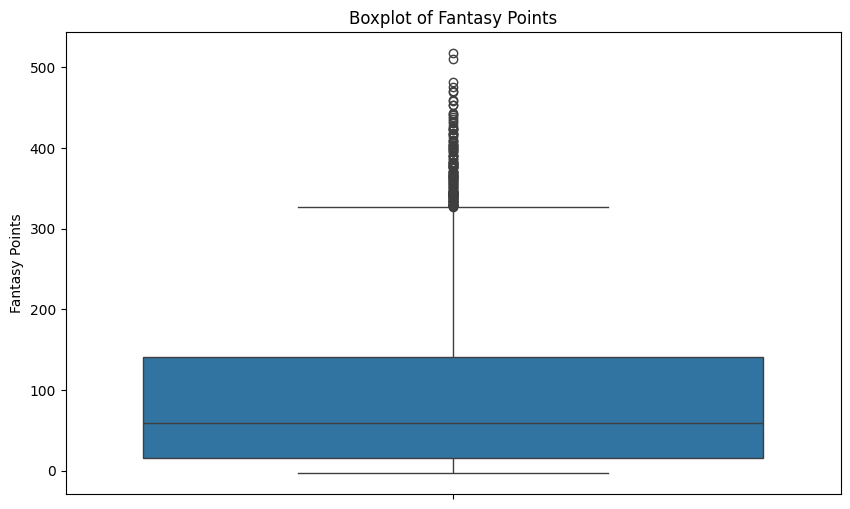

In [1079]:
plt.figure(figsize=(10, 6))
sns.boxplot(yearly_player_data['fantasy_points_ppr'])
plt.title("Boxplot of Fantasy Points")
plt.ylabel("Fantasy Points")
plt.show()

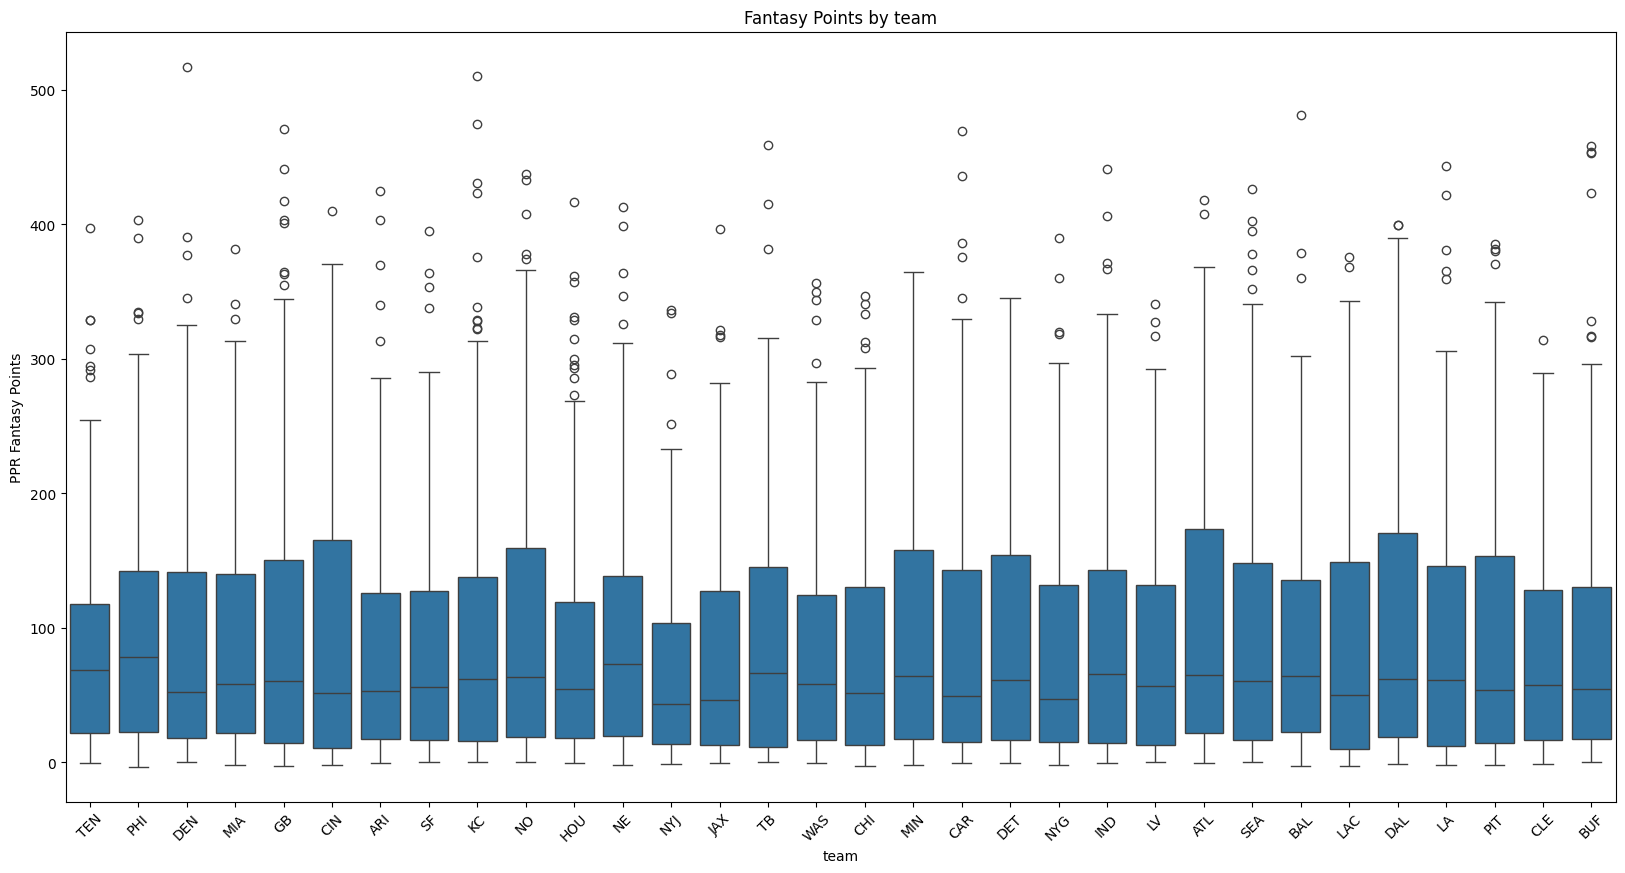

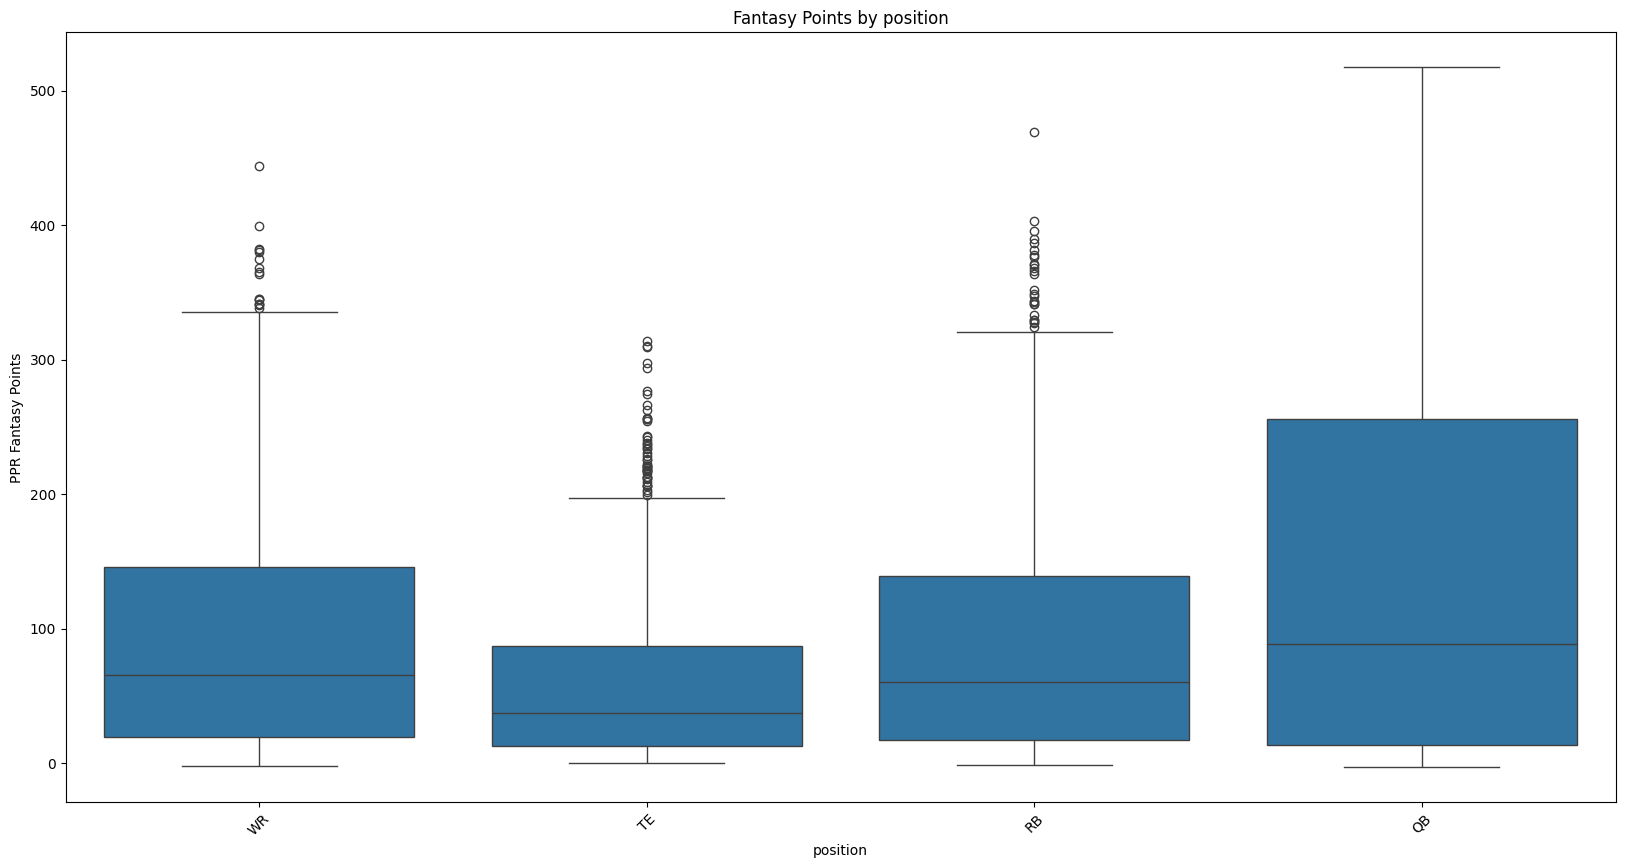

In [1080]:
object_columns = yearly_player_data.select_dtypes(include='object').columns
columns_to_plot = ['team', 'position']

# Plot each categorical column and price
for col in columns_to_plot:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=yearly_player_data, x=yearly_player_data[col], y=yearly_player_data['fantasy_points_ppr'])
    plt.title("Fantasy Points by " + col)
    plt.ylabel("PPR Fantasy Points")
    plt.xticks(rotation=45)
    plt.show()

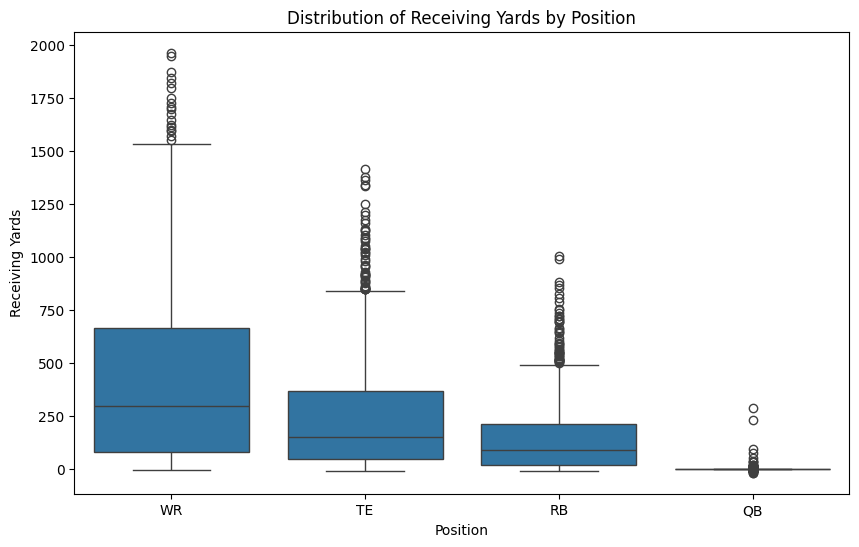

In [1081]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=yearly_player_data, x='position', y='receiving_yards')
plt.title("Distribution of Receiving Yards by Position")
plt.xlabel("Position")
plt.ylabel("Receiving Yards")
plt.show()

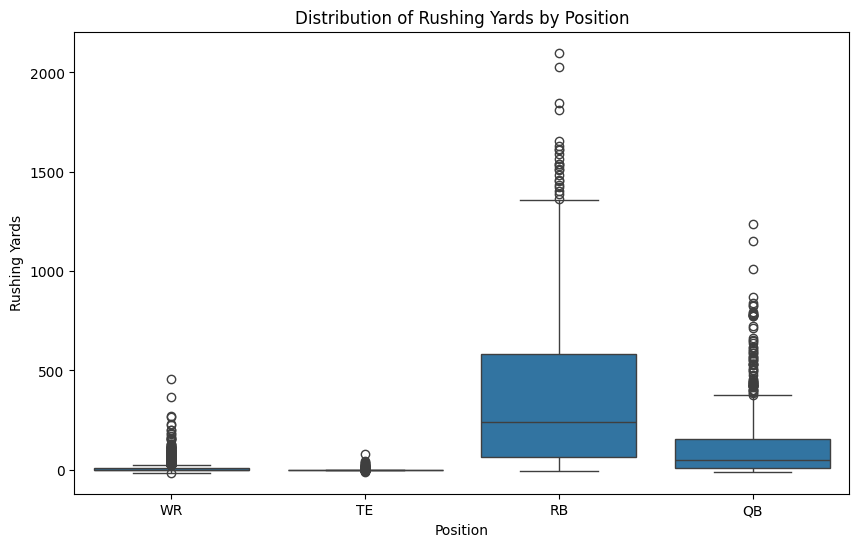

In [1082]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=yearly_player_data, x='position', y='rushing_yards')
plt.title("Distribution of Rushing Yards by Position")
plt.xlabel("Position")
plt.ylabel("Rushing Yards")
plt.show()

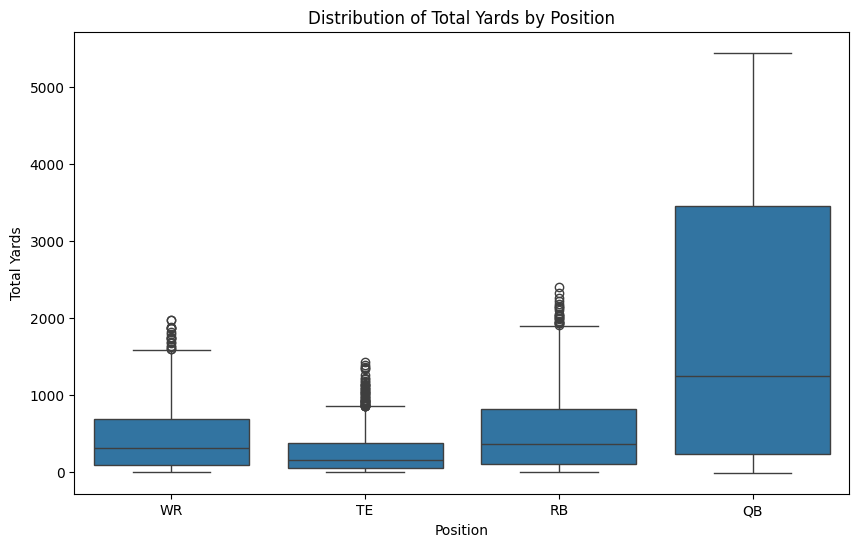

In [1083]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=yearly_player_data, x='position', y='total_yards')
plt.title("Distribution of Total Yards by Position")
plt.xlabel("Position")
plt.ylabel("Total Yards")
plt.show()

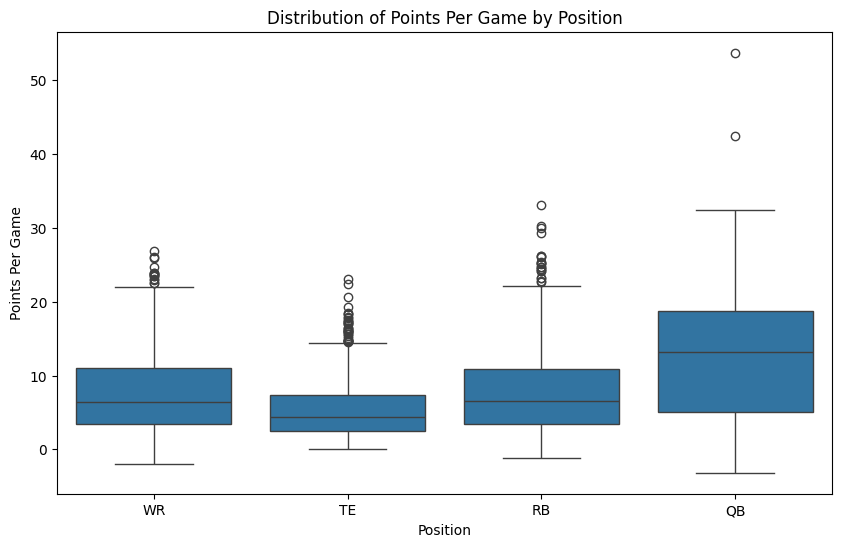

In [1084]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=yearly_player_data, x='position', y='ppg')
plt.title("Distribution of Points Per Game by Position")
plt.xlabel("Position")
plt.ylabel("Points Per Game")
plt.show()

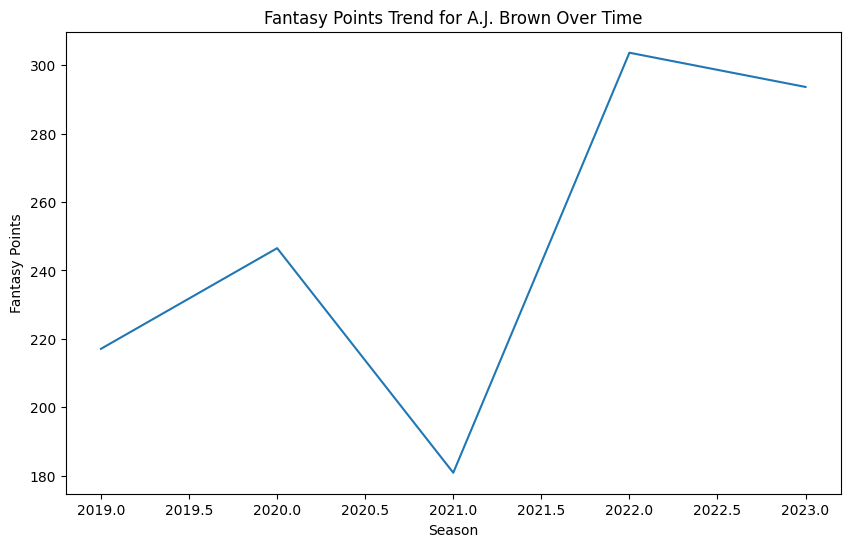

In [1085]:
selected_player = 'A.J. Brown'
player_data = yearly_player_data.loc[yearly_player_data['player_name'] == selected_player]

plt.figure(figsize=(10, 6))
sns.lineplot(data=player_data, x='season', y='fantasy_points_ppr')
plt.title("Fantasy Points Trend for {} Over Time".format(selected_player))
plt.xlabel("Season")
plt.ylabel("Fantasy Points")
plt.show()

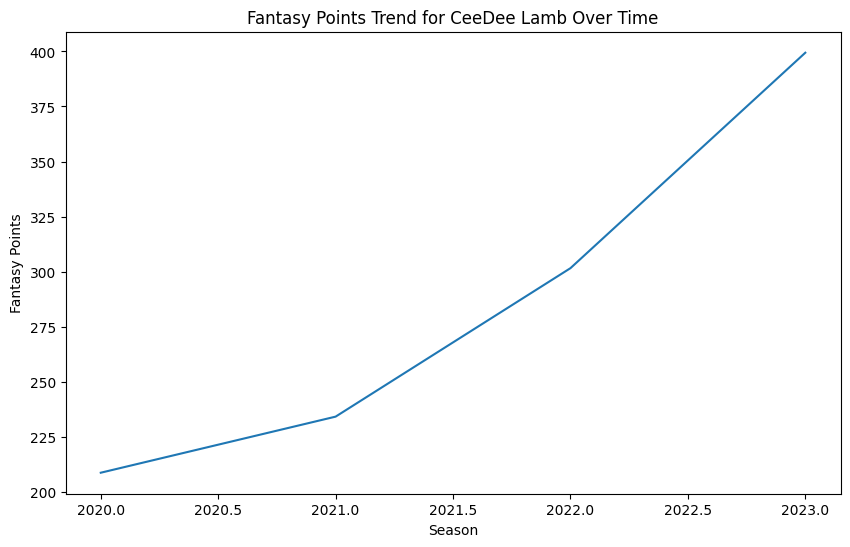

In [1086]:
selected_player = 'CeeDee Lamb'
player_data = yearly_player_data.loc[yearly_player_data['player_name'] == selected_player]

plt.figure(figsize=(10, 6))
sns.lineplot(data=player_data, x='season', y='fantasy_points_ppr')
plt.title("Fantasy Points Trend for {} Over Time".format(selected_player))
plt.xlabel("Season")
plt.ylabel("Fantasy Points")
plt.show()

### Engineering Features

In [1087]:
# Get numerical features with good correlation to target
correlation_matrix = yearly_player_data.select_dtypes(include=['int64', 'float64']).corr().round(2)

corr_with_target = correlation_matrix['fantasy_points_ppr']

selected_features = corr_with_target[(corr_with_target > 0.4) | (corr_with_target < -0.4)].sort_values(ascending=False)
selected_features

,fantasy_points_ppr
fantasy_points_ppr,1.00
ppg,0.88
total_yards,0.84
yards_pct,0.83
total_tds,0.83
average_ppg,0.80
offense_pct,0.76
games,0.76
offense_snaps,0.76
touches,0.75


In [1088]:
# Create reference dataset to use later when presenting predictions alongside player info
player_info = yearly_player_data[['season', 'player_name', 'team', 'college']]
yearly_player_data = yearly_player_data.drop(columns=['player_id', 'player_name', 'college'])

In [1089]:
# Keep only features from selected_features
numerical_features_to_keep = selected_features.index.tolist()
numerical_features = yearly_player_data[numerical_features_to_keep]

In [1090]:
categorical_features = yearly_player_data.select_dtypes(include=['object'])
categorical_features

,team,position
0,TEN,WR
1,TEN,WR
2,TEN,WR
3,PHI,WR
4,PHI,WR
...,...,...
5658,LV,WR
5659,JAX,WR
5660,JAX,WR
5661,NYJ,RB


In [1091]:
# Join selected features to remaining categorical features
X = categorical_features.join(numerical_features)

In [1092]:
# Get team's mean fantasy points
team_impact = X.groupby('team')['fantasy_points_ppr'].mean().sort_values(ascending=False)
print(team_impact)

team
DAL    106.213678
ATL    105.654201
NO     104.218201
GB     100.912333
KC     100.706552
MIN     98.710349
PIT     98.552386
NE      97.680541
SEA     97.253636
DET     97.230889
LA      96.283279
PHI     96.257444
TB      95.282935
LAC     93.524174
LV      92.858413
CIN     91.170870
IND     90.547619
BUF     90.103297
DEN     89.098969
CAR     88.991273
BAL     88.308191
MIA     88.013191
TEN     86.095055
SF      84.272500
HOU     84.108083
CHI     83.090526
ARI     82.802010
CLE     81.905810
WAS     80.875490
JAX     79.702487
NYG     79.668889
NYJ     68.105231
Name: fantasy_points_ppr, dtype: float64


In [1093]:
team_avg_fantasy_points = X.groupby('team')['fantasy_points_ppr'].mean()
X['team_avg_fantasy_points'] = X['team'].map(team_avg_fantasy_points)
X = X.drop(columns=['team'])

In [1094]:
X.drop(columns='fantasy_points_ppr', inplace=True)
y = yearly_player_data['fantasy_points_ppr']

In [1095]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

Rather than One Hot Encode 32 teams and create a large amount of new features, I opted to see what each team's mean contribution to fantasy points was and used that.

### Baseline Model

In [1096]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [1097]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1098]:
results = []
def train_and_evaluate_model(model, model_name):
    # Preprocessor and model
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit model and time it
    start_time = time.time()
    pipe.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Predict on training set
    y_train_pred = pipe.predict(X_train)

    # Predict on test set
    y_test_pred = pipe.predict(X_test)

    # Evaluate
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append results
    results.append({
        'Model': model_name,
        'Fit Time': fit_time,
        'Train R2 Score': train_r2,
        'Test R2 Score': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })

In [1099]:
baseline_model = LinearRegression()
train_and_evaluate_model(baseline_model, "Linear Regression")
baseline_results = pd.DataFrame(results)
baseline_results

,Model,Fit Time,Train R2 Score,Test R2 Score,Train MSE,Test MSE
0,Linear Regression,0.023921,0.999743,0.999682,2.223172,2.756397
